# Fitting a Line

In [1]:
## Reading housing data-file
housing = read.csv(file = 'housing.csv')
head(housing)

,RM,LSTAT,PTRATIO,MEDV
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.575,4.98,15.3,504000
2,6.421,9.14,17.8,453600
3,7.185,4.03,17.8,728700
4,6.998,2.94,18.7,701400
5,7.147,5.33,18.7,760200
6,6.430,5.21,18.7,602700


In [2]:
## Fitting the linear regression model
lm_md = lm(MEDV ~ RM + LSTAT + PTRATIO, data = housing)

## Extracting model parameters
summary(lm_md)


Call:
lm(formula = MEDV ~ RM + LSTAT + PTRATIO, data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-231330  -55228   -8137   41788  326444 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415464.4    68845.7   6.035 3.17e-09 ***
RM           86565.2     7888.9  10.973  < 2e-16 ***
LSTAT       -10849.3      732.1 -14.819  < 2e-16 ***
PTRATIO     -19492.1     2039.0  -9.559  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 88130 on 485 degrees of freedom
Multiple R-squared:  0.7176,	Adjusted R-squared:  0.7159 
F-statistic: 410.9 on 3 and 485 DF,  p-value: < 2.2e-16


# Predicting with Linear Model

In [3]:
## Once we have a fitted linear model, we can use it to make predictions
## Let's assume the following: RM = 6.5, LSTAT = 15, PTRATIO = 13. 
## Let's use the model to predict the MEDV
new_point = data.frame(RM = 6.5, LSTAT = 15, PTRATIO = 13)

## Predicting the MEDV with the linear model
predict(lm_md, newdata = new_point, type = 'response')

1 
562000.8

# Exploring the data

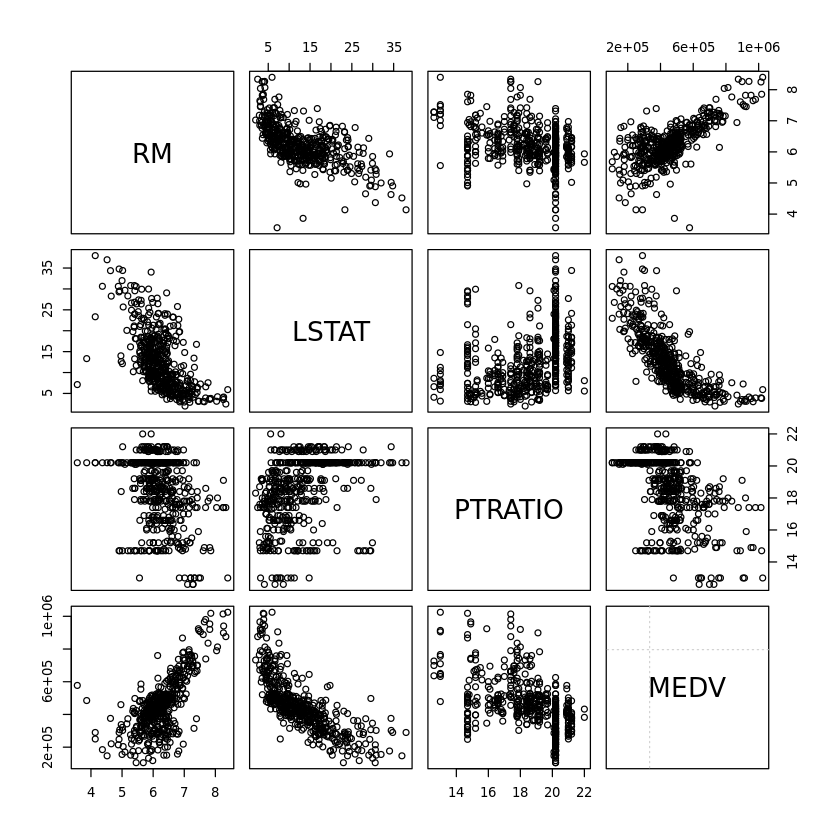

In [7]:
## Plotting the data-frame
plot(housing)
grid()

# Fitting a Nonlinear Relationship

In [8]:
## From the above plot, it's clear that the relationship between 
## LSTAT and MEDV is non-linear (1/X). Thus we create a new feature.
housing$LSTAT_new = 1 / housing$LSTAT

## Fitting the new linear model
lm_md = lm(MEDV ~ RM + LSTAT_new + PTRATIO, data = housing)

## Extracting model parameters
summary(lm_md)


Call:
lm(formula = MEDV ~ RM + LSTAT_new + PTRATIO, data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-284190  -52110     147   54342  313413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   193089      61694   3.130  0.00185 ** 
RM             75101       7853   9.563  < 2e-16 ***
LSTAT_new    1255791      76300  16.459  < 2e-16 ***
PTRATIO       -18456       1976  -9.338  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 85090 on 485 degrees of freedom
Multiple R-squared:  0.7368,	Adjusted R-squared:  0.7352 
F-statistic: 452.5 on 3 and 485 DF,  p-value: < 2.2e-16
